In [15]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os


In [4]:
# checks name of data to determine plot labels 
def checkPlotType(fname):
    if "plat_latency" in fname:
        yl = "Average platform latency (s)"
        ttl = "Average platform latency across days"
        lim = [-3, 33]
    elif "tone_frz" in fname:
        yl = "Average freezing during tone (%)"
        ttl = "Average tone freezing across days"
        lim = [-10, 110]
    elif "tone_off" in fname:
        yl = "Average off-platform freezing during tone (%)"
        ttl = "Average off-platform tone freezing across days"
        lim = [-10, 110]
    elif "tone_pf_frz" in fname:
        yl = "Average on-platform freezing during tone (%)"
        ttl = "Average on-platform tone freezing across days"
        lim = [-10, 110]
    elif "avoids" in fname:
        yl = "Proportion shock avoids"
        ttl = "Average shock avoidance across days"
        lim = [-0.1, 1.1]
    elif "per_pf_time" in fname:
        yl = "Average platform time during tone (%)"
        ttl = "Average platform time during tone across days"
        lim = [-10, 110]

    return yl, ttl, lim

In [22]:
# functions
def makePlot(fname, savedir):
    data = pd.read_csv(fname, header=None)
    # add headers
    data.columns=['ID','Day','Value']

    # Calculate mean and SEM
    mean_values = data.groupby('Day')['Value'].mean()
    sem_values = data.groupby('Day')['Value'].sem()

    # Create a color palette with as many colors as there are unique Identifiers
    palette = sns.color_palette("husl", len(data['ID'].unique()))

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(6, 4))

    # Loop over each unique Identifier with an associated color
    for color, identifier in zip(palette, data['ID'].unique()):
        # Filter the data for this identifier
        data_id = data[data['ID'] == identifier]
        
        # Plot the data for this identifier with the associated color
        ax.plot(data_id['Day'], data_id['Value'], marker='o', color=color, label=identifier)

    # Plot the mean and SEM
    ax.errorbar(mean_values.index, mean_values, yerr=sem_values, color='black', label='Mean ± SEM')

    # identify the type of data and assign labels
    [yl, ttl, lim] = checkPlotType(fname)


    # Set labels and title
    ax.set_xlabel('Day')
    ax.set_ylabel(yl)
    ax.set_title(ttl)

    # Add a legend
    ax.legend()

    # Set xticks to be integers only
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Set y-axis limit
    ax.set_ylim(lim[0], lim[1])

    # make save name
    name2 = Path(fname)
    name2 = Path(name2.stem)
    savedir2 = Path(savedir)
    savename = Path(savedir2) / name2
    savename = f"{savename}.jpg"
    
    # save figure
    #os.makedirs(savedir, exist_ok=True)
    #fig.savefig(savename)

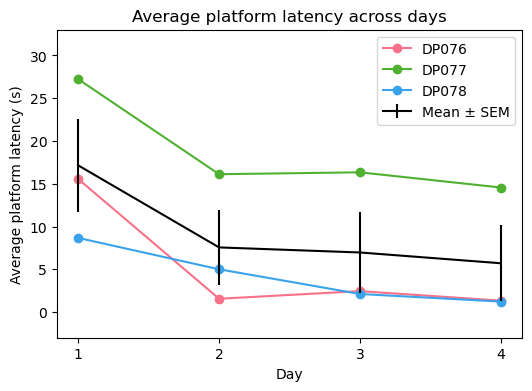

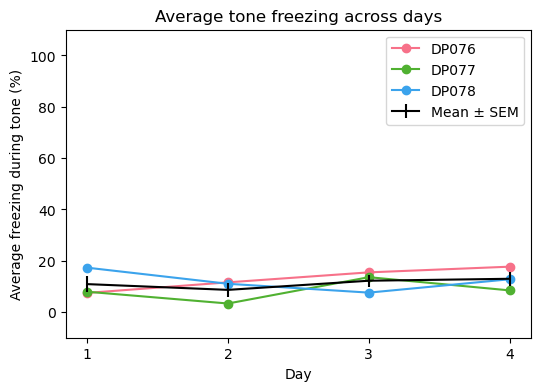

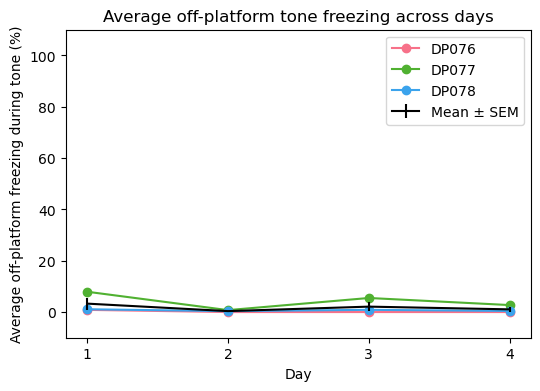

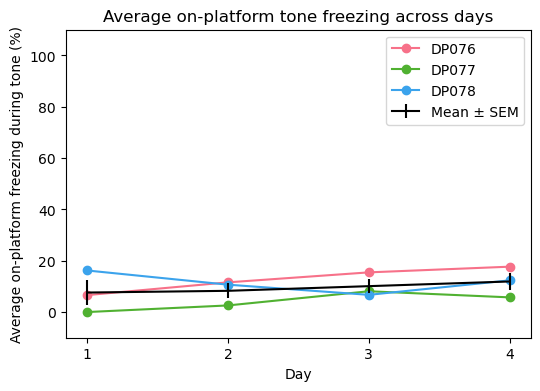

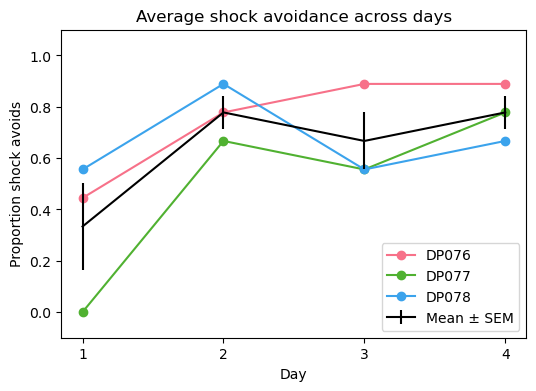

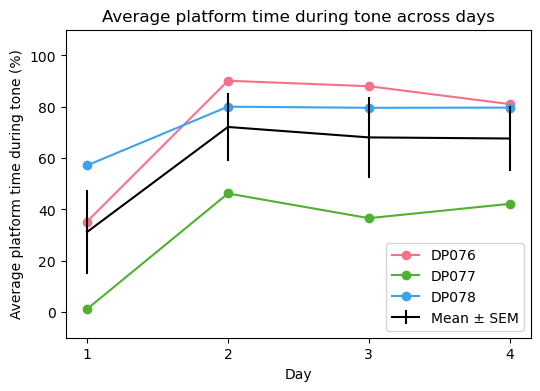

In [23]:
## Save dir
savedir = r"C:\Users\boba4\Box\Zach_repo\Projects\DA PMA\PMAR_JAWS_June2023\cohort2_laser_tone\group plots"

## list of files to plot, expected format .csv files, col1 = ID, col2 = day number, col3 = value. no header
data_list = [
    r"C:\Users\boba4\Box\Zach_repo\Projects\DA PMA\PMAR_JAWS_June2023\cohort2_laser_tone\batch\plat_latency.csv",
    r"C:\Users\boba4\Box\Zach_repo\Projects\DA PMA\PMAR_JAWS_June2023\cohort2_laser_tone\batch\tone_frz.csv",
    r"C:\Users\boba4\Box\Zach_repo\Projects\DA PMA\PMAR_JAWS_June2023\cohort2_laser_tone\batch\tone_off_pf_frz_avg.csv",
    r"C:\Users\boba4\Box\Zach_repo\Projects\DA PMA\PMAR_JAWS_June2023\cohort2_laser_tone\batch\tone_pf_frz.csv",
    r"C:\Users\boba4\Box\Zach_repo\Projects\DA PMA\PMAR_JAWS_June2023\cohort2_laser_tone\batch\avoids.csv",
    r"C:\Users\boba4\Box\Zach_repo\Projects\DA PMA\PMAR_JAWS_June2023\cohort2_laser_tone\batch\per_pf_time_tone_avg.csv"
]

for f in data_list:
    makePlot(f, savedir)